# Networks: Friends, Epidemics & Terrorists
## Handout for Active Learning Exercise #1

The goal of this ALE is to help you understand the basic concepts of network science and get acclimated to the `Networkx` (https://networkx.org/) library in Python.

Now, we will learn how to create a network in NetworkX and do a few simple calculations on networks.

The first thing we want to do is import the packages that we will need. For now, this includes:

- NetworkX: The library for the creation, manipulation, and study of structure, dynamics, and functions of networks.
- NumPy: Stands for NUMeric PYthon. The de-facto library for handling matrices and vectors in Python which provides a wide array of mathematical functions.
- Matplotlib: A library for constructing plots. 

In [ ]:
import networkx as nx            # Import NetworkX library as nx for its network functions
import numpy as np               # Import NumPy library as np for its mathematical functions
import matplotlib.pyplot as plt  # Import Matplotlib library as plt for its plotting functions

## Networks and Graphs
If we want to understand a complex system, we first need to know how its components interact with each other. In other words we need a map of its wiring diagram. A network (a.k.a. graph) is a catalog of a system’s components often called nodes (a.k.a. vertices) and the direct interactions between them, called links (a.k.a. edges).

The image below introduces two basic network parameters:

- Number of nodes, or N, represents the number of components in the system. We will often call N the size of the network. To distinguish the nodes, we label them with i = 1, 2, ..., N.

- Number of links, which we denote with L, represents the total number of interactions between the nodes. Links are rarely labeled, as they can be identified through the nodes they connect. For example, the (2, 4) link connects nodes 2 and 4. 

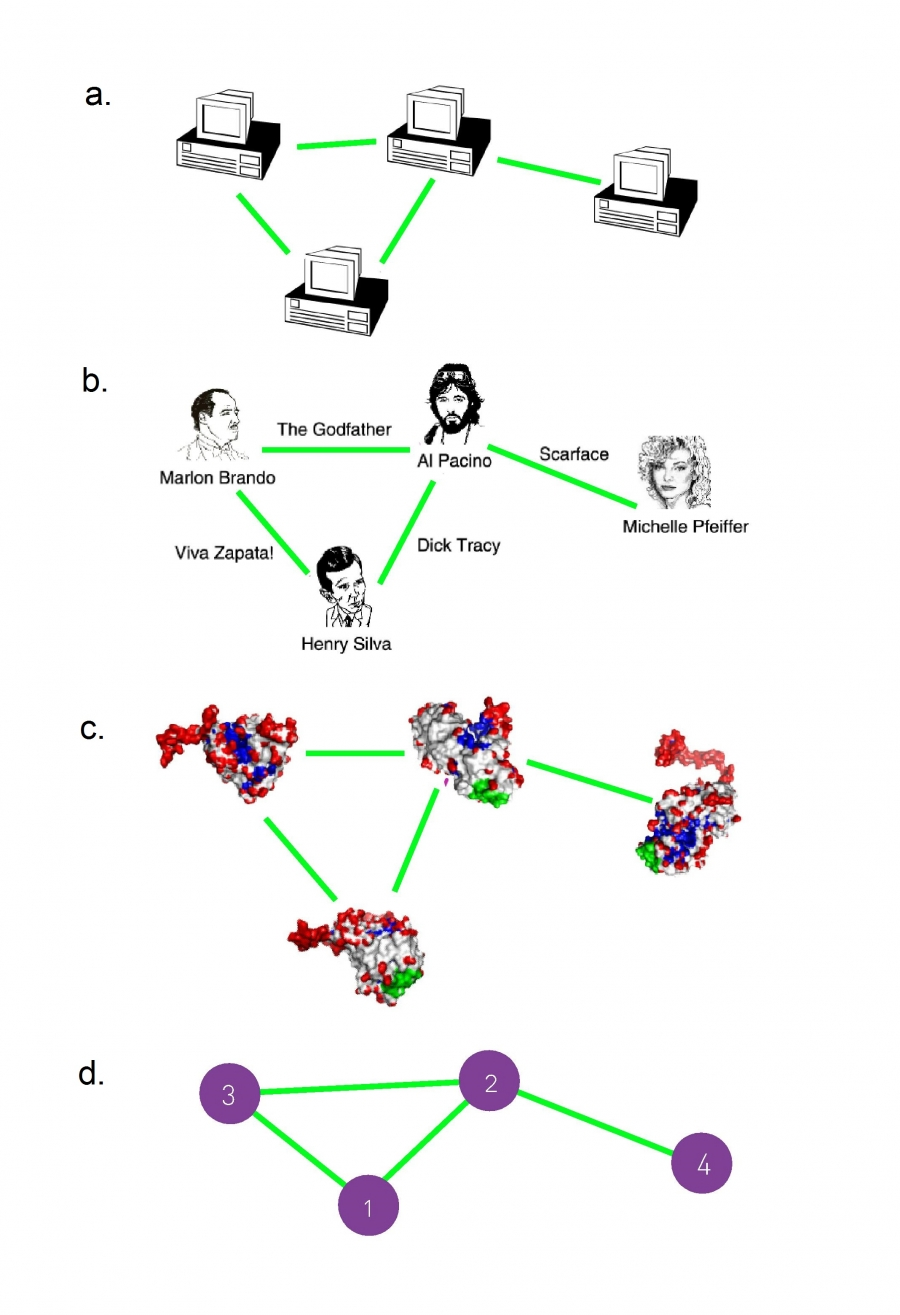

*Different Networks, Same Graph*

The figure shows a small subset of (a) the Internet, where computers are connected to each other; (b) the Hollywood actor network, where two actors are connected if they played in the same movie; (c) a protein-protein interaction network, where two proteins are connected if there is experimental evidence that they can bind to each other in the cell. While the nature of the nodes and the links differs, these networks have the same network (graph) representation, consisting of N = 4 nodes and L = 4 links, shown in (d).

Lets start by creating an empty network with no nodes and links. Please note that we use "#" to write comments about our code inside the coding cells.

In [ ]:
# Create an empty graph (network) with no nodes and no edges (links). 
G = nx.Graph()

### Nodes

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time,

In [ ]:
G.add_node(1)         # Add node 1

or add nodes from any iterable container, such as a list

In [ ]:
G.add_nodes_from([2, 3, 4])         # Add nodes 2, 3 and 4     

You can show the list of nodes using

In [ ]:
G.nodes()         # Print the list of nodes

NodeView((1, 2, 3, 4))

You can find the number of nodes using

In [ ]:
G.number_of_nodes()         # Find the number of nodes

4

### Edges

G can also be grown by adding one edge at a time. (Note that when you add a new link, the nodes that are connected through this link will be automatically added.) 

In [ ]:
G.add_edge(1, 2)          # Add a link between nodes 1 and 2

by adding a list of edges,

In [ ]:
G.add_edges_from([(2, 3), (1, 3), (2, 4)])          # Add three links between the nodes

You can show the list of edges using

In [ ]:
G.edges()         # Print the list of links

EdgeView([(1, 2), (1, 3), (2, 3), (2, 4)])

You can find the total number of links using

In [ ]:
G.number_of_edges()         # Find the number of links

4

You can find the neighbors of a node using

In [ ]:
list(G.neighbors(1))          # Find the neighbors of a node

[2, 3]

### Adjacency Matrix

Lets check the adjacency matrix first to see whether we have the correct edges.

In [ ]:
A = nx.to_numpy_matrix(G) # Create the adjacency matrix A
print(A.astype(int))      # Print A. As you can see this matrix is correct. 

[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]


### Drawing Networks

Now, it's time to verify the network you created using a plot of our graph. NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib is included.

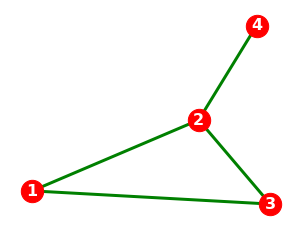

In [ ]:
plt.figure(figsize=(4,3))                                           # Specify the figure size
nx.draw(G, with_labels=True, font_weight='bold', node_size=500, \
        node_color='red', font_size=16, font_color='white',width=3, edge_color='green') # The figure properties
plt.show()                                                          # Show the figure

## Degree

A key property of each node is its degree, representing the number of links it has to other nodes. Note, however, that the definition of degree is in terms of number of links, not number of neighboring nodes.

The degree can represent the number of mobile phone contacts an individual has in the call graph (i.e. the number of different individuals the person has talked to), or the number of citations a research paper gets in the citation network.

We denote with $k_{i}$ the degree of the ith node in the network. For example, for the undirected network $G$ shown above we have $k_{1}$=2, $k_{2}$=3, $k_{3}$=2, $k_{4}$=1. You can find the degree of all nodes using

In [ ]:
G.degree()          # Get the degree of all nodes

DegreeView({1: 2, 2: 3, 3: 2, 4: 1})

You can find the degree of a specific node using 

In [ ]:
G.degree[4]           # Get the degree of a specific node, e.g: node 4

1

## Links

In an undirected network the total number of links, L, can be expressed as the sum of the node degrees divided by 2:

$$ 
L = \frac{1}{2} \sum\limits _{i=1} ^{N} k_{i}                
$$ 

Here the 1/2 factor corrects for the fact that in this sum each link is counted twice. For example, the link connecting the nodes 2 and 4 will be counted once in the degree of node 2 and once in the degree of node 4. 

For the network G, the total number of links is $\frac{1}{2}(2+3+2+1) = 4$. You can find the total number of links using

In [ ]:
G.number_of_edges()           # Get the total number of links in G

4

## Average Degree

An important property of a network is its average degree ($<k>$), which for an undirected network is (sum of degrees / total number of nodes).

$$ 
<k> = \frac{1}{N} \sum\limits _{i=1} ^{N} k_{i}                 
$$ 

Please note that <𝑘>=2𝐿/𝑁. You can find the average degree of a network using

In [ ]:
AvgDegree = 2*G.number_of_edges()/G.number_of_nodes() # Find the average degree for the network
AvgDegree                                             # Print the average degree

2.0

We can combine the code above to perform all the network creation and analysis together

List of all nodes:  [1, 2, 3, 4]
Total number of nodes:  4
List of all links:  [(1, 2), (1, 3), (2, 3), (2, 4)]
Total number of links:  4
Node total degrees: [(1, 2), (2, 3), (3, 2), (4, 1)]
Total degree for Node 4: 1
Average Degree:  2.0
The adjacency matrix: 
 [[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


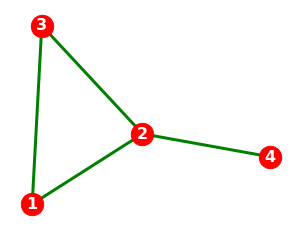

In [ ]:
G = nx.Graph()                                                # Construct an undirected graph
G.add_edges_from([(1, 2), (1,3), (2,3), (2,4)])               # Add the links.
print("List of all nodes: ", list(G.nodes()))                 # Print the list of nodes                    
print("Total number of nodes: ", G.number_of_nodes())         # Print the number of nodes (N) 
print("List of all links: ", list(G.edges()))                 # Print the list of links
print("Total number of links: ", G.number_of_edges())         # Print the number of links (L)
print("Node total degrees:", list(G.degree()))                # Degree of nodes
print("Total degree for Node 4:", G.degree[4])                # Degree of node 4
print("Average Degree: ", 2*G.number_of_edges()/G.number_of_nodes()) # Average degree (<k>) = 2*L / N

A = nx.to_numpy_matrix(G)                                     # Create the adjacency matrix A
print("The adjacency matrix: \n", A)                          # Print A   

plt.figure(figsize=(4,3))                                            # Specify the figure size
nx.draw(G, with_labels=True, font_weight='bold', node_size=500, \
        node_color='red', font_size=16, font_color='white',width=3, edge_color='green') # The figure properties
plt.show()                                                           # Show the figure                         

## Directed Networks
The links of a network can be directed or undirected. A network is called directed (or digraph) if all of its links are directed; it is called undirected if all of its links are undirected. 

The DiGraph class provides additional methods and properties specific to directed edges. To allow algorithms to work with both classes easily, the directed versions of neighbors is equivalent to successors while degree reports the sum of in_degree and out_degree even though that may feel inconsistent at times.

Please note that mathematical formulas are provided in the lecture notes. I will only remind you here that in **directed networks** we distinguish between incoming degree, $k_{i}^{in}$, representing the number of links that point to node i, and outgoing degree, $k_{i}^{out}$, representing the number of links that point from node i to other nodes. Finally, a node’s total degree, $k_i$, is given by
$$
k_{i} = k_{i}^{in} + k_{i}^{out}
$$

We can create and analyze a directed network using the block of code below. Please note that I am using the node names A, B, C, and D instead of 1, 2, 3, and 4 here.

List of all nodes:  ['A', 'B', 'C', 'D']
Total number of nodes:  4
List of all links:  [('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'A')]
Total number of links:  4
Node indegrees: [('A', 1), ('B', 1), ('C', 1), ('D', 1)]
Node outdegrees: [('A', 1), ('B', 2), ('C', 1), ('D', 0)]
Node total degrees: [('A', 2), ('B', 3), ('C', 2), ('D', 1)]
Indegree for Node D: 1
Outdegree for Node D: 0
Total degree for Node D: 1
Average Degree:  1.0
The adjacency matrix: 
 [[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
The plot of the network: 



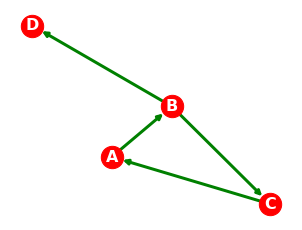

In [ ]:
DG = nx.DiGraph()                                   # Construct a directed graph
DG.add_edges_from([("A", "B"),("B", "C"),("B","D"),("C", "A")])# Add the edges to the network
print("List of all nodes: ", list(DG.nodes()))                 # Print the list of nodes                       
print("Total number of nodes: ", DG.number_of_nodes())         # Print the number of nodes (N) 
print("List of all links: ", list(DG.edges()))                 # Print the list of links
print("Total number of links: ", DG.number_of_edges())         # Print the number of links (L)
print("Node indegrees:", list(DG.in_degree()))                 # InDegree of nodes
print("Node outdegrees:", list(DG.out_degree()))               # OutDegree of nodes
print("Node total degrees:", list(DG.degree()))                # TotalDegree of nodes
print("Indegree for Node D:", DG.in_degree["D"])               # InDegree of node D
print("Outdegree for Node D:", DG.out_degree["D"])             # OutDegree of node D
print("Total degree for Node D:", DG.degree["D"])              # TotalDegree of node D
print("Average Degree: ", DG.number_of_edges()/DG.number_of_nodes()) # Average degree (<k>) = 2*L / N

A = nx.to_numpy_matrix(DG)                          # Create the adjacency matrix A. Note that this matrix is flipped from the one in class.
print("The adjacency matrix: \n", A)    # Print A 

print("The plot of the network: \n")                # Plot the network 
plt.figure(figsize=(4,3))                           # Set the figure size
nx.draw(DG, with_labels=True, font_weight='bold', node_size=500, \
        node_color='red', font_size=16, font_color='white',width=3, edge_color='green')  # Plot properties 
plt.show()                                          # Show the plot

## Weighted Networks (Undirected Version)

In weighted networks links can have different values attached to them. For example, if you are creating an undirected network for phone calls between people you will only link two people if they had a conversation. In the weighted network case, you can also record how long did the phone conversation take using network weights. Please note that we can create a weighted network for both undirected and directed networks.

In [ ]:
WG = nx.Graph()                     # Construct an undirected graph
WG.add_weighted_edges_from([(1, 2, 2), (1,3,0.5), (2,3,1), (2,4,4)])  # Add the links. Weight=3rd number
print("List of all nodes: ", list(WG.nodes()))                 # Print the list of nodes                    
print("Total number of nodes: ", WG.number_of_nodes())         # Print the number of nodes (N) 
print("List of all links: ", list(WG.edges()))                 # Print the list of links
print("Total number of links: ", WG.number_of_edges())         # Print the number of links (L)
print("Node total degrees:", list(WG.degree(weight='weight')))        # Total weight of nodes
print("Degree for Node 4:", WG.degree(4, weight='weight'))      # Total weight of node 4
print("Average Degree: ", 2*WG.size(weight='weight')/WG.number_of_nodes()) # Average degree (<k>) = 2*L / N

A = nx.to_numpy_matrix(WG)                          # Create the adjacency matrix A
print("The adjacency matrix: \n", A)                # Print A                            

List of all nodes:  [1, 2, 3, 4]
Total number of nodes:  4
List of all links:  [(1, 2), (1, 3), (2, 3), (2, 4)]
Total number of links:  4
Node total degrees: [(1, 2.5), (2, 7), (3, 1.5), (4, 4)]
Degree for Node 4: 4
Average Degree:  3.75
The adjacency matrix: 
 [[0.  2.  0.5 0. ]
 [2.  0.  1.  4. ]
 [0.5 1.  0.  0. ]
 [0.  4.  0.  0. ]]


Plotting a weighted network is a bit more challenging. You can do it using a code like this

The plot of the weighted network: 



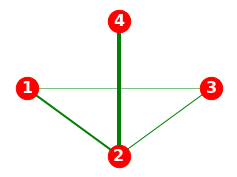

In [ ]:
print("The plot of the weighted network: \n")    

widths = nx.get_edge_attributes(WG, 'weight')   # Set the width of links as the weights
nodelist = WG.nodes()                           # List of nodes
plt.figure(figsize=(4,3))                       # Set the figue size   
pos = nx.shell_layout(WG)                       # Set the position os the nodes

# Plot the nodes
nx.draw_networkx_nodes(WG,pos, nodelist=nodelist, node_size=500, node_color='red', alpha=1)

# Plot the edges
nx.draw_networkx_edges(WG,pos, edgelist = widths.keys(), width=list(widths.values()), edge_color='green', alpha=1)

# Plot the labels
nx.draw_networkx_labels(WG, pos=pos, font_size=16, font_weight='bold', labels=dict(zip(nodelist,nodelist)),
                        font_color='white')
plt.box(False)
plt.show()

## Networks with Self Interactions (Undirected Version)

We create and analyze the networks with self interactions similarly.

List of all nodes:  [1, 2, 3, 4]
Total number of nodes:  4
List of all links:  [(1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (4, 4)]
Total number of links:  6
Node degrees: [(1, 4), (2, 3), (3, 2), (4, 3)]
Degree for Node 4: 3
Average Degree:  3.0
The adjacency matrix: 
 [[1. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 1.]]
The plot of the network: 



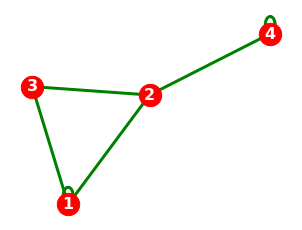

In [ ]:
SG = nx.Graph()                                                 # Construct a graph
SG.add_edges_from([(1,1),(1, 2), (1, 3), (2,3),(2, 4),(4,4)])   # Add the links
print("List of all nodes: ", list(SG.nodes()))                  # Print the list of nodes          
print("Total number of nodes: ", SG.number_of_nodes())          # Print the number of nodes (N) 
print("List of all links: ", list(SG.edges()))                  # Print the list of links
print("Total number of links: ", SG.number_of_edges())          # Print the number of links (L)
print("Node degrees:", list(SG.degree()))                       # Degree of nodes
print("Degree for Node 4:", SG.degree[4])                 # Degree of node 4
print("Average Degree: ", 2*SG.number_of_edges()/SG.number_of_nodes()) # Average degree (<k>) = 2*L / N

A = nx.to_numpy_matrix(SG)                          # Create the adjacency matrix A
print("The adjacency matrix: \n", A)                # Print A. Note that for the self edges NetworkX uses 1 instead of 2. 

print("The plot of the network: \n")                # Plot the network 
plt.figure(figsize=(4,3))                           # Set the figure size
nx.draw(SG, with_labels=True, font_weight='bold', node_size=500, \
        node_color='red', font_size=16, font_color='white',width=3, edge_color='green')  # Plot properties 
plt.show()                                         # Show the plot

## Multigraph (Undirected Version)

Multigraph network creation and analysis is similar. Though the plot generation is a bit more tedious.

In [ ]:
MG = nx.MultiGraph()                                                  # Construct a multigraph
MG.add_edges_from([(1,2),(1,2),(1, 3), (2,3),(2, 4),(2, 4),(2, 4)])   # Add the links
print("List of all nodes: ", list(MG.nodes()))                        # Print the list of nodes      
print("Total number of nodes: ", MG.number_of_nodes())                # Print the number of nodes (N)
print("List of all links: ", list(MG.edges()))                        # Print the list of links
print("Total number of links: ", MG.number_of_edges())                # Print the number of links (L)
print("Node degrees:", list(MG.degree()))                             # Degree of nodes
print("Degree for Node 4:", MG.degree[4])                       # Degree of node 4
print("Average Degree: ", 2*MG.number_of_edges()/MG.number_of_nodes())# Average degree (<k>) = 2*L / N

A = nx.to_numpy_matrix(MG)                          # Create the adjacency matrix A
print("The adjacency matrix: \n", A.astype(int))    # Print A 

List of all nodes:  [1, 2, 3, 4]
Total number of nodes:  4
List of all links:  [(1, 2), (1, 2), (1, 3), (2, 3), (2, 4), (2, 4), (2, 4)]
Total number of links:  7
Node degrees: [(1, 3), (2, 6), (3, 2), (4, 3)]
Degree for Node 4: 3
Average Degree:  3.5
The adjacency matrix: 
 [[0 2 1 0]
 [2 0 1 3]
 [1 1 0 0]
 [0 3 0 0]]


The plot of the network: 



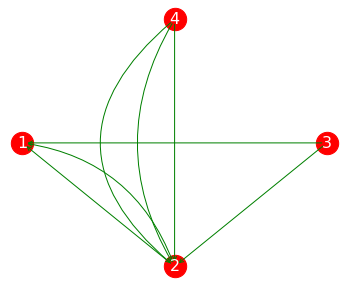

In [ ]:
print("The plot of the network: \n")          # Plot the multigraph network 
pos = nx.shell_layout(MG)                     # Set the layout of the plot
plt.figure(figsize=(6,5))                     # Set the plot size
ax = plt.gca()                                # Get the current axis of the plot    

# Plot the edges
for e in MG.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color='green',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )

nx.draw_networkx_nodes(MG, pos, node_color = 'r', node_size = 500, alpha = 1) # Plot the nodes
nx.draw_networkx_labels(MG, pos, font_size=16, font_color='white')            # Plot the labels
plt.axis('off')                                                               
plt.show()                                                                    # Show the plot

## Complete Graph (Undirected Version)
We can create a complete graph and analyze it as follows.

List of all nodes:  [1, 2, 3, 4]
Total number of nodes:  4
List of all links:  [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
Total number of links:  6
Node degrees: [(1, 3), (2, 3), (3, 3), (4, 3)]
Degree for Node 4: 3
Average Degree:  1.5
The adjacency matrix: 
 [[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]
The plot of the network: 



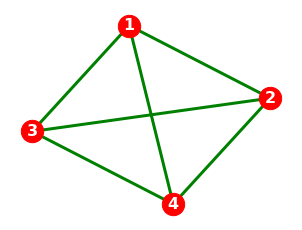

In [ ]:
CG = nx.complete_graph(4)            # Construct a complete graph with 4 nodes. Default node numbering start from 0.     
mapping = {0: 1, 1: 2, 2: 3, 3: 4}   # Mapping the node list to 1,2,3 and 4
CG = nx.relabel_nodes(CG, mapping)   # Mapping the node list to 1,2,3 and 4
print("List of all nodes: ", list(CG.nodes()))             # Print the list of nodes                
print("Total number of nodes: ", CG.number_of_nodes())     # Print the number of nodes (N)
print("List of all links: ", list(CG.edges()))             # Print the list of links
print("Total number of links: ", CG.number_of_edges())     # Print the number of links (L)
print("Node degrees:", list(CG.degree()))            # Degree of nodes
print("Degree for Node 4:", CG.degree[4])            # Degree of node 4
print("Average Degree: ", 2*CG.number_of_edges()/CG.number_of_nodes()) # Average degree (<k>) = 2*L / N

A = nx.to_numpy_matrix(CG)                                 # Create the adjacency matrix A
print("The adjacency matrix: \n", A.astype(int))           # Print A 

print("The plot of the network: \n")                       # Plot the network 
plt.figure(figsize=(4,3))                                  # Set the figure size
nx.draw(CG, with_labels=True, font_weight='bold', node_size=500, \
        node_color='red', font_size=16, font_color='white',width=3, edge_color='green')  # Plot properties 
plt.show()                                                 # Show the plot